![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

### Step 0 - Read Data Description

**From [here](http://archive.ics.uci.edu/ml/datasets/Online+Retail)**

**Data Infomation**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute Infomation**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

### Step 1 - Checking the data

**Import tools set**

In [238]:
%config InlineBackend.figure_format ='retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Import data**

In [239]:
!wget -nc "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
retail = pd.read_csv("Online_Retail.csv", encoding='latin1')

File ‘Online_Retail.csv’ already there; not retrieving.



In [240]:
# Print out First 5 rows from dataframe
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [241]:
# Print out brief info
retail.info()
retail.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 2 - Cleaning the data

**Check for unusual rows**

In [242]:
retail[(retail['InvoiceNo'].str.contains('\D', regex=True)) | (retail['InvoiceNo'].str.len() != 6)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


In [243]:
retail[(retail['StockCode'].str.contains('\D', regex=True)) | (retail['StockCode'].str.len() != 5)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/10 8:45,18.00,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 9:02,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,12/1/10 9:02,2.55,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 9:02,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 9:02,3.39,17850.0,United Kingdom


**Clean**

In [244]:
# Normalize InvoiceNo to number and create a new feature called 'IsCancellation'
retail['IsCancellation'] = retail['InvoiceNo'].str.upper().str.startswith('C')
retail['InvoiceNo'] = retail['InvoiceNo'].str.replace('\D','', regex = True)

In [245]:
# Normalize StockCode
retail['StockCode'] = retail['StockCode'].str.replace(r'(\d{5})(\D)', r'\1', regex = True)
# retail['StockCode'] = retail['StockCode'].str.replace('\D+', np.nan, regex = True)

In [246]:
retail['Country'] = retail['Country'].astype('category')
retail['InvoiceDate'] = retail['InvoiceDate'].astype('datetime64')

**Check for NaN values**

In [247]:
retail.isna().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
IsCancellation         0
dtype: int64

**Examine few examples of NaN values**

In [248]:
retail[retail.Description.isna()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation
75229,542553,21805,NaN,-1,2011-01-28 14:49:00,0.0,NaN,United Kingdom,False
282819,561660,22502,NaN,1,2011-07-28 16:18:00,0.0,NaN,United Kingdom,False
38542,539585,21009,NaN,1,2010-12-20 12:54:00,0.0,NaN,United Kingdom,False
242441,558346,35965,NaN,3,2011-06-28 14:45:00,0.0,NaN,United Kingdom,False
171714,551442,85060,NaN,-4,2011-04-28 15:50:00,0.0,NaN,United Kingdom,False
243344,558450,21145,NaN,40,2011-06-29 13:41:00,0.0,NaN,United Kingdom,False
280720,561486,21765,NaN,-2,2011-07-27 13:48:00,0.0,NaN,United Kingdom,False
440212,574520,21181,NaN,-6,2011-11-04 13:44:00,0.0,NaN,United Kingdom,False
508796,579272,22812,NaN,2,2011-11-29 10:00:00,0.0,NaN,United Kingdom,False
202329,554378,20975,NaN,3,2011-05-24 11:35:00,0.0,NaN,United Kingdom,False


**Exclude negative Quatity entries**

In [249]:
retail = retail[retail['Quantity'] > 0]

**Exclude negative Price entries**

In [250]:
retail = retail[retail['UnitPrice'] > 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [259]:
retail[(retail['Country'] == "United Kingdom")].groupby(by='CustomerID').count().sort_values(by="InvoiceNo", ascending=False).iloc[[1]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,IsCancellation
CustomerID,,,,,,,,
14096.0,5111,5111,5111,5111,5111,5111,5111,5111


**The customer with the highest money spent on purchases comes from Netherlands**

In [261]:
retail['Total'] = retail['UnitPrice'] * retail['Quantity']
retail[(retail['Country'] == "United Kingdom") & (~retail['IsCancellation'])].groupby(by='CustomerID').sum().sort_values(by="Total", ascending=False).iloc[[1]]

,Quantity,UnitPrice,IsCancellation,Total
CustomerID,,,,
17450.0,69993,1143.32,False,194550.79


**On which year had the highest sales?**

In [267]:
retail['Year'] = retail['InvoiceDate'].dt.year
retail[~retail['IsCancellation']].groupby('Year').sum().sort_values(by = 'Total', ascending=False)

,Quantity,UnitPrice,CustomerID,IsCancellation,Total
Year,,,,,
2011,5229137,1.871543e+06,5.679210e+09,False,9.842938e+06
2010,359239,1.999045e+05,4.061968e+08,False,8.237461e+05


**How many orders (per hour)?**

In [273]:
retail['Hour'] = retail['InvoiceDate'].dt.hour
ordersPerHour = retail[~retail['IsCancellation']].groupby('Hour').count()
ordersPerHour

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation,Total,Year
Hour,,,,,,,,,,,
6,1,1,1,1,1,1,1,1,1,1,1
7,379,379,379,379,379,379,379,379,379,379,379
8,8800,8800,8800,8800,8800,8800,8690,8800,8800,8800,8800
9,33701,33701,33701,33701,33701,33701,21944,33701,33701,33701,33701
10,47822,47822,47822,47822,47822,47822,37997,47822,47822,47822,47822
11,56139,56139,56139,56139,56139,56139,49084,56139,56139,56139,56139
12,77120,77120,77120,77120,77120,77120,72065,77120,77120,77120,77120
13,71001,71001,71001,71001,71001,71001,64026,71001,71001,71001,71001
14,65937,65937,65937,65937,65937,65937,54118,65937,65937,65937,65937


**Make a plot about number of orders per hour**

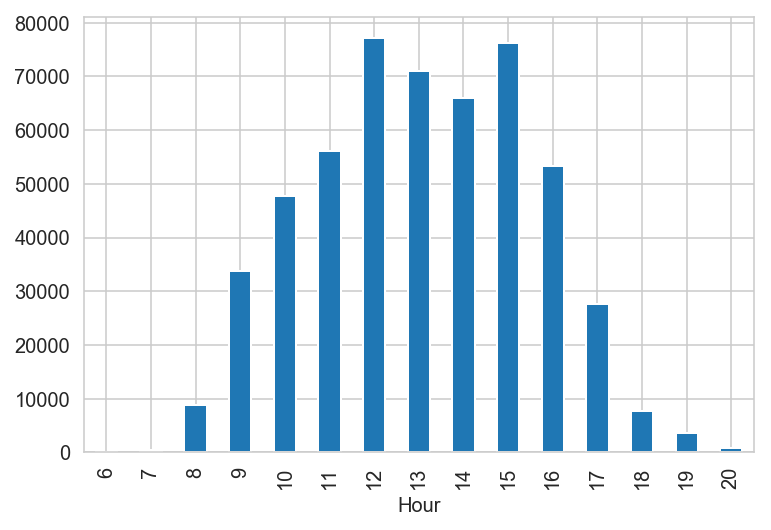

In [277]:
ordersPerHour['InvoiceNo'].plot(kind='bar')

**How many orders (per month)?**

In [278]:
retail['Month'] = retail['InvoiceDate'].dt.month
ordersPerMonth = retail[~retail['IsCancellation']].groupby('Month').count()
ordersPerMonth

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation,Total,Year,Hour
Month,,,,,,,,,,,,
1,34306,34306,34306,34306,34306,34306,21229,34306,34306,34306,34306,34306
2,27105,27105,27105,27105,27105,27105,19927,27105,27105,27105,27105,27105
3,35803,35803,35803,35803,35803,35803,27175,35803,35803,35803,35803,35803
4,29096,29096,29096,29096,29096,29096,22642,29096,29096,29096,29096,29096
5,36164,36164,36164,36164,36164,36164,28320,36164,36164,36164,36164,36164
6,35977,35977,35977,35977,35977,35977,27185,35977,35977,35977,35977,35977
7,38645,38645,38645,38645,38645,38645,26825,38645,38645,38645,38645,38645
8,34483,34483,34483,34483,34483,34483,27007,34483,34483,34483,34483,34483
9,49261,49261,49261,49261,49261,49261,40028,49261,49261,49261,49261,49261


**Make a plot about number of orders per month**

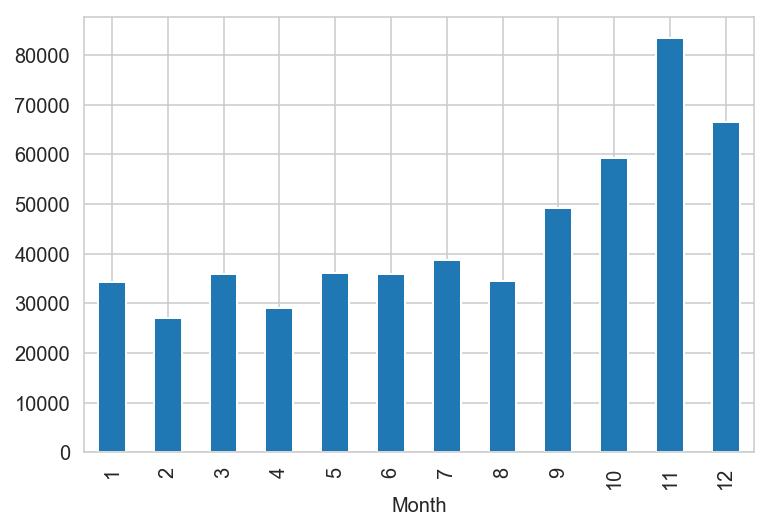

In [279]:
ordersPerMonth['InvoiceNo'].plot(kind='bar')

**Top 10 items most sales**

In [283]:
retail.groupby('StockCode').sum().sort_values(by = 'Quantity', ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,IsCancellation,Total,Year,Hour,Month
StockCode,,,,,,,,
23843,80995,2.08,16446.0,False,168469.60,2011,9,12
85099,79715,9723.07,45136102.0,False,155234.78,7826588,49810,26890
23166,78033,367.12,3047321.0,False,81700.92,502750,3292,2066
22197,56921,1486.56,16490386.0,False,51354.02,2867562,18385,11018
84077,55047,172.20,7226036.0,False,13841.85,1079867,6790,4149
85123,37952,7504.80,31667793.0,False,106471.28,4689418,29836,16229
84879,36461,2564.49,21450268.0,False,59094.93,2994274,18899,10855
21212,36419,1039.05,16135698.0,False,21259.10,2754968,17595,9330
23084,30788,2466.20,12564016.0,False,66964.99,2083396,13472,10053


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

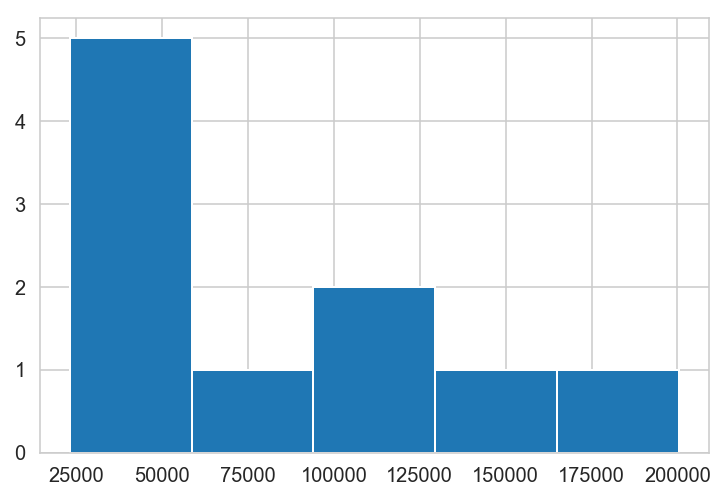

In [302]:
retail2 = retail[retail['Country'] != 'United Kingdom']
retail2.groupby('Country').sum().sort_values('Quantity', ascending=False).head(10)['Quantity'].hist(bins = 5)

### You are awesome!!